<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

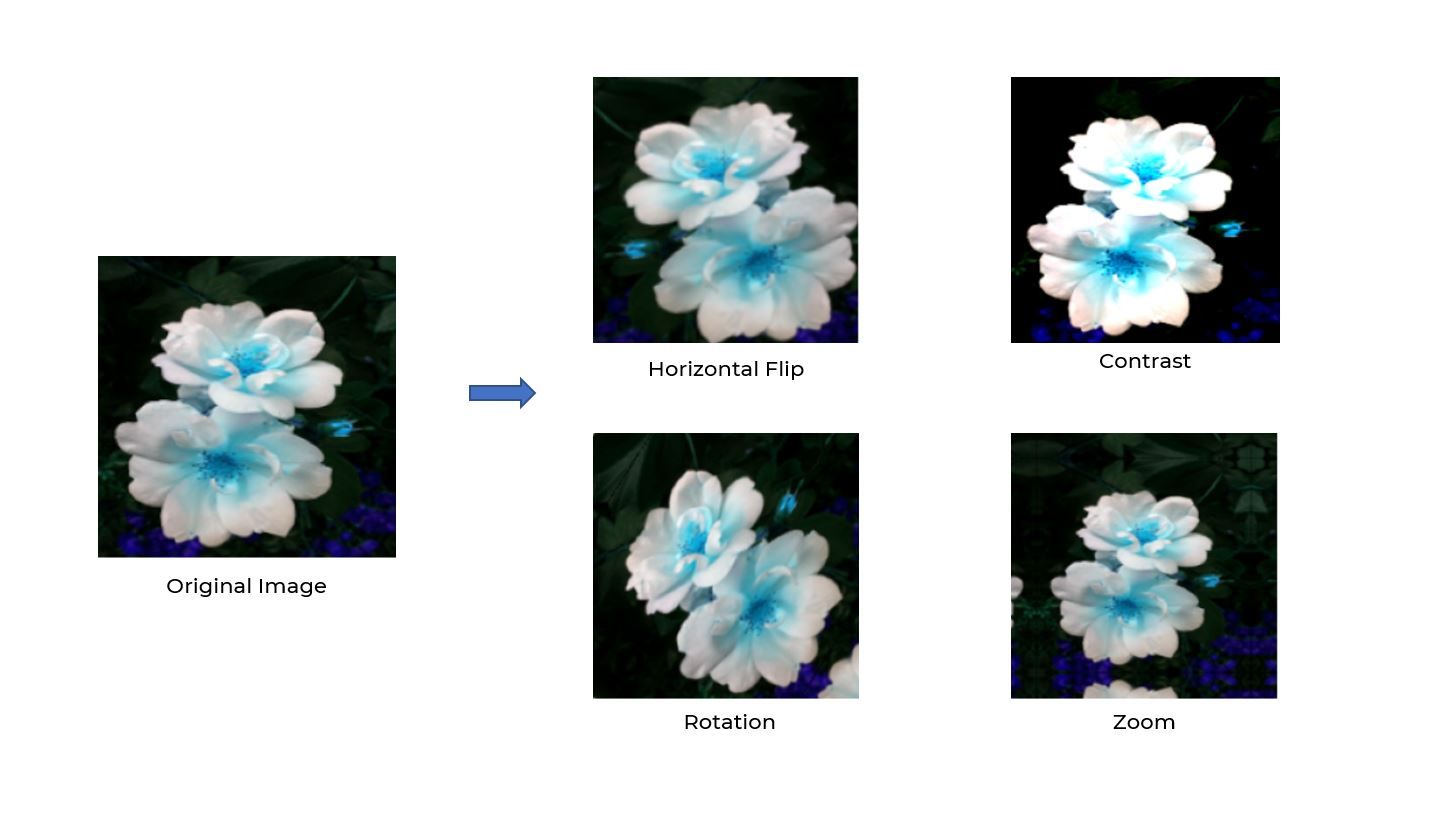

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/14761980161_2d6dbaa4bb_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8759118120_9eac064e38_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/458011386_ec89115a19.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2039797043_d5b709f275_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2512148749_261fa9d156.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'),
 PosixPath('datasets/flower_photos/roses/172311368_49412f881b.jpg'),
 PosixPath('datasets/flower_photos/roses/323872063_7264e7e018_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15566697073_9a214b700e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5570018782_c56bee942f.jpg')]

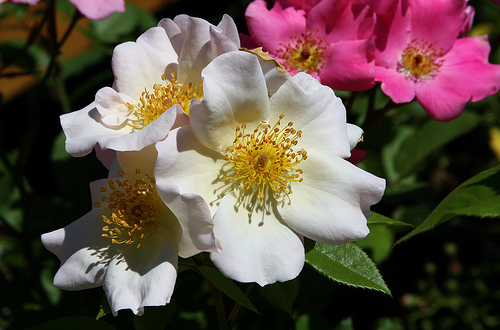

In [8]:
PIL.Image.open(str(roses[1]))

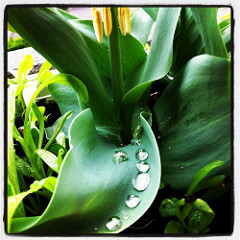

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'),
 PosixPath('datasets/flower_photos/roses/172311368_49412f881b.jpg'),
 PosixPath('datasets/flower_photos/roses/323872063_7264e7e018_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15566697073_9a214b700e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5570018782_c56bee942f.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(333, 500, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [21]:
num_classes = 5

model = Sequential([
  layers.InputLayer((180, 180, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),

  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3271 - loss: 1.5025
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6271 - loss: 0.9840
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7096 - loss: 0.7642
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7744 - loss: 0.5784
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8727 - loss: 0.3652
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9581 - loss: 0.1476
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9710 - loss: 0.1081
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9865 - loss: 0.0557
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9805 - loss: 0.0712
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9915 - loss: 0.0322


In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6341 - loss: 1.7876


[1.8345232009887695, 0.6394335627555847]

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [23]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [29]:
num_classes = 5

model = Sequential([
  layers.InputLayer((180, 180, 3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),

  layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3416 - loss: 1.6056
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5571 - loss: 1.0898
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6199 - loss: 0.9666
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.6362 - loss: 0.9223
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6650 - loss: 0.8658
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7002 - loss: 0.7876
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7074 - loss: 0.7689
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7187 - loss: 0.7263
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7304 - loss: 0.6789
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7463 - loss: 0.6677
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7572 - loss: 0.6291
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy:

In [30]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7428 - loss: 0.7520


[0.7480677366256714, 0.7472766637802124]